In [90]:
import math
import numpy as np

def cov(x, y):
    return np.mean(x * y) - np.mean(x) * np.mean(y)

def corr(x, y):
    if np.var(x) == 0:
        return 0
    return cov(x, y) / math.sqrt(np.var(x) * np.var(y))

def generate_data(size, d):
    x = []
    x.append(np.random.normal(3, 1, size))
    x.append(np.random.normal(-2, 1, size))
    x.append(x[0] + 2 * x[1])
    x.append((x[1] + 2)**2)
    x.append(np.random.binomial(n=1, p=0.8, size=size))
    for _ in range(d - 5):
        x.append(np.random.normal(0, 0.1, size))

    def compute_y(x):
        y = 4 - 3 * x[0] * x[0] + x[2] - 0.01 * x[3] + x[1] * x[4] + np.random.normal(0, 0.1, len(x[0]))
        return y
    
    def transpose(temp):
        temp = np.array(temp)
        return temp.T
    
    xt = transpose(x)
    y = compute_y(x)
    
    return x, xt, y


class DecisionTree():   
    def __init__(self, x, y, d, max_depth, min_sample_size):
        self.x = x
        self.y = y
        
        self.max_depth = max_depth
        self.min_sample_size = min_sample_size
        self.depth = d 
        self.child = len(self.x[0]) <= self.min_sample_size or self.depth == self.max_depth or np.var(y) == 0
        
        self.ind = -1
        self.threshold = 0
        
        self.result = np.mean(y)
        self.left, self.right = None, None

        if not self.child:
            self.split()
    
    def find_best_feature(self):
        all_corr = [abs(corr(xi, self.y)) for xi in self.x]
        return np.argmax(all_corr)
    
    def find_threshold_split(self, ind):
        indices = self.x[ind].argsort()
        
        for i in range(len(self.x)):
            self.x[i] = self.x[i][indices]
        self.y = self.y[indices]
        
        threshold = -1
        mn = float('inf')

        for i in range(len(self.y) - 1):
            fltr_left = self.x[ind] <= self.x[ind][i]
            fltr_right = self.x[ind] > self.x[ind][i]
            
            var_left = np.var(self.y[fltr_left])
            var_right = np.var(self.y[fltr_right])
            
            left = np.sum(fltr_left)
            right = np.sum(fltr_right)

            err_left = left / len(self.y) * var_left
            err_right = right / len(self.y) * var_right
            
            err = err_left + err_right
            
            if err < mn:
                threshold, mn = (self.x[ind][i] + self.x[ind][i + 1]) / 2, err
        return threshold
    
    def split(self):
        self.ind = self.find_best_feature()
        self.threshold = self.find_threshold_split(self.ind)

        fltr_left = self.x[self.ind] <= self.threshold
        fltr_right = self.x[self.ind] > self.threshold
                
        x_left = [arr[fltr_left] for arr in self.x]
        x_right = [arr[fltr_right] for arr in self.x]
            
        y_left = self.y[fltr_left]
        y_right = self.y[fltr_right]
        
        self.left = DecisionTree(x_left, y_left, self.depth + 1, self.max_depth, self.min_sample_size)
        self.right = DecisionTree(x_right, y_right, self.depth + 1, self.max_depth, self.min_sample_size)

    @staticmethod
    def predict(node, arr):
        if node.child:
            return node.result
        if arr[node.ind] <= node.threshold:
            return DecisionTree.predict(node.left, arr)
        else:
            return DecisionTree.predict(node.right, arr)

def compute_mse_dt(x, y, dt):
    err = 0
    for i in range(len(y)):
        yp = DecisionTree.predict(dt, x[i])
        err += (abs(yp - y[i]) ** 2)
    err = err / len(y)
    return err

def compute_mse_constant_model(x, y):
    err = 0
    c = np.mean(y)
    for i in range(len(y)):
        err += abs(c - y[i]) ** 2
    err = err / len(y)
    return err

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29


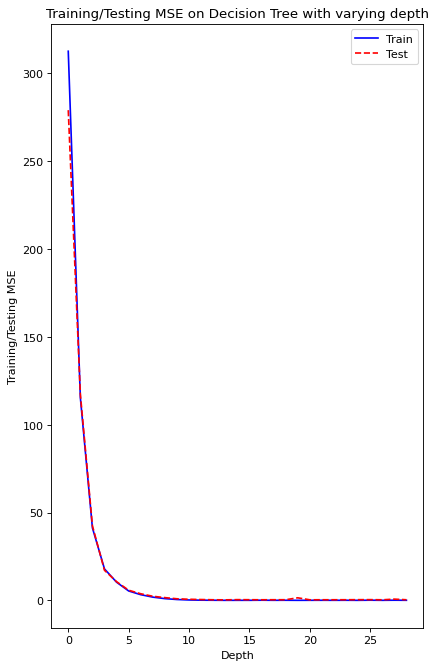

In [91]:
TRAIN_SIZE = 10000
TEST_SIZE = 1000
D = 10

def question2():
    train_errors = []
    test_errors = []
    
    #generate data
    x, xt, y = generate_data(TRAIN_SIZE, D) #d = 10, TRAIN_SIZE/TEST_SIZE remain unchanged
    _, tx, testy = generate_data(TEST_SIZE, D)
    
    for i in range(1, 30):    
        print('Iteration: ', i)
        x, xt, y = generate_data(TRAIN_SIZE, D) #d = 10, TRAIN_SIZE/TEST_SIZE remain unchanged
        _, tx, testy = generate_data(TEST_SIZE, D)
        #provide copies of the data (we want to use the same dataset on each tree)
        dt = DecisionTree(x, y, 1, i, 7)
        
        #compute errors
        training_err = compute_mse_dt(xt, y, dt)
        test_err = compute_mse_dt(tx, testy, dt)
        
        train_errors.append(training_err)
        test_errors.append(test_err)
    
    #build plot (can be seen in pdf)
    plt.figure(figsize = (6, 10), dpi = 80)
    plt.title('Training/Testing MSE on Decision Tree with varying depth')
    plt.plot(train_errors, '-b', label = 'Train')
    plt.plot(test_errors, '--r', label = 'Test')
    plt.xlabel('Depth')
    plt.ylabel('Training/Testing MSE')
    plt.legend()
    plt.show()
    
    return train_errors, test_errors

train, test = question2()

In [45]:
test

[297.83685807380033, 111.27150195640944, 299.99902189825764, 298.4208215686328]

In [7]:
test

[311.04301529293764,
 116.8674298792993,
 41.54630337130264,
 19.238403315791132,
 10.835326419747652,
 6.288472094812859,
 3.6291325433214134,
 2.0975886059012328,
 1.5721999709866585,
 0.9283948227213948,
 0.7188719194097164,
 0.47245675331920844,
 0.3944329427536863,
 0.3987612744181935,
 0.36698240942776805,
 0.3532580953292699,
 0.5867687313490383,
 0.49085424327333094,
 0.92335986873737,
 0.4322039665596671,
 0.4915669162710996,
 0.4666349553820926,
 0.5216828703572544,
 0.31339818257217517,
 0.3642848863914359,
 0.3514188523849965,
 0.5065699148879117,
 0.44421460460319656,
 0.4990043419486542,
 0.39034349320111994,
 0.3486145579371661,
 0.36288295269018495,
 1.3718804258329027,
 0.5893730341484965,
 0.47792436148876477,
 0.3842964526429901,
 1.0498561639365651,
 0.38915776055570633,
 0.46733084410366355,
 0.7651968069028369,
 0.5191181564242658,
 0.4309181616080082,
 0.3943629457750008,
 0.38277037691833676,
 0.48604111881382944,
 0.45391641303237956,
 0.43499286978403495,
 0.4

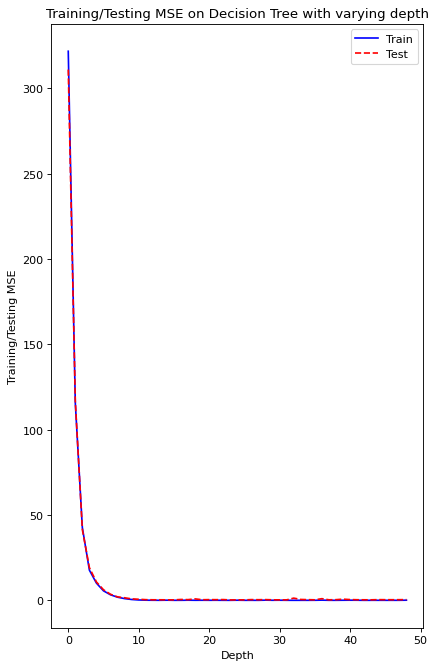

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 10), dpi=80)
plt.title('Training/Testing MSE on Decision Tree with varying depth')
plt.plot(train, '-b', label = 'Train')
plt.plot(test, '--r', label = 'Test')
plt.xlabel('Depth')
plt.ylabel('Training/Testing MSE')
plt.legend()
plt.show()

import numpy as np
np.argmin(test)

In [12]:
test[23]

0.31339818257217517

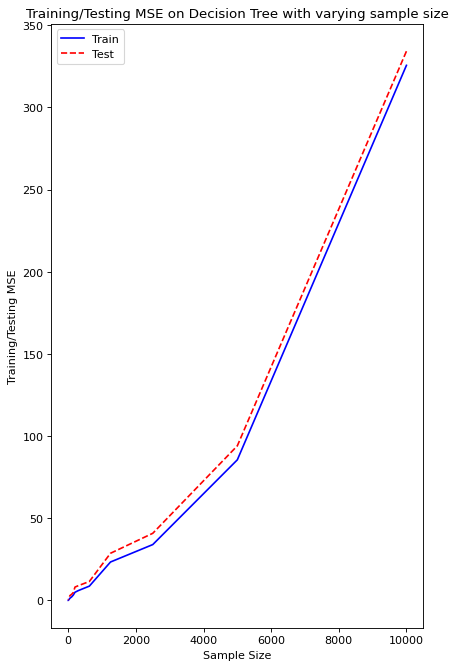

In [73]:
TRAIN_SIZE = 10000
TEST_SIZE = 1000
D = 10

def question3():
    train_errors = []
    test_errors = []
    
    #set of sample sizes that we will build decision trees out of
    #note that these are a set of decreasing and somewhat random numbers (more explanation in pdf)
    sample_sizes = [10000, 5000, 2500, 1250, 625, 300, 200, 150, 100, 50, 25, 20, 15, 10, 5, 4, 3, 2, 1]
    
    #generate dataset
    #x and y are used for the decision tree
    #xt is transpose of training dataset
    #tx (transpose of test dataset) and testy are a part of testing dataset
    x, xt, y = generate_data(TRAIN_SIZE, D)
    _, tx, testy = generate_data(TEST_SIZE, D)

    for sample_size in sample_sizes: #iterate through each sample size
        #build decision tree with copies of dataset
        dt = DecisionTree(copy.deepcopy(x), copy.deepcopy(y), 1, 150, sample_size)
        
        #compute and store errors
        training_err = compute_mse_dt(xt, y, dt)
        test_err = compute_mse_dt(tx, testy, dt)
        train_errors.append(training_err)
        test_errors.append(test_err)
    
    #build plots
    plt.figure(figsize = (6, 10), dpi=80)
    plt.title('Training/Testing MSE on Decision Tree with varying sample size')
    plt.plot(sample_sizes, train_errors, '-b', label = 'Train')
    plt.plot(sample_sizes, test_errors, '--r', label = 'Test')
    plt.xlabel('Sample Size')
    plt.ylabel('Training/Testing MSE')
    plt.legend()
    plt.show()
    
    return train_errors, test_errors

train, test = question3()

In [75]:
train

[325.5522471003025,
 85.49821878524372,
 33.92946768640991,
 23.320157730530372,
 8.643977988696564,
 5.939253472183559,
 4.907648803676967,
 3.2191387407108754,
 2.0561278339321776,
 1.2783446711301694,
 0.5047513032663817,
 0.3867224928146528,
 0.277916999477971,
 0.17127000048942748,
 0.055522397402486615,
 0.036161024045301825,
 0.021475532839644876,
 0.006260928584616785,
 0.0]

In [38]:
test

[327.8708925177799,
 85.2515253950248,
 29.558108474479948,
 16.79797420075321,
 14.321568364826176,
 5.0133545178078265,
 4.571112828584742,
 3.3949335464629344,
 2.309284325030751,
 2.940657379751045,
 0.7025228168906367,
 0.8511011693945566,
 0.5958030565498682,
 0.47762325551886764,
 0.45818777630033974,
 0.43180383793164795,
 0.38350478544828887,
 0.5490168938179302,
 0.6181364270717121]

In [39]:
sample_sizes = [10000, 5000, 2500, 1250, 625, 300, 200, 150, 100, 50, 25, 20, 15, 10, 5, 4, 3, 2, 1]

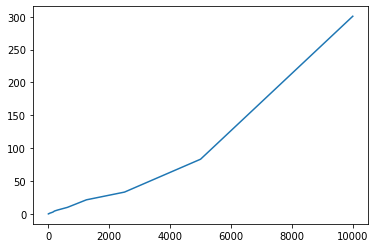

In [40]:
plt.plot(sample_sizes, train)

In [65]:
TRAIN_SIZE = 100000
TEST_SIZE = 1000
D = 10 #choose an arbitrary D value (explained in pdf)

x, xt, y = generate_data(TRAIN_SIZE, D)
_, tx, testy = generate_data(TEST_SIZE, D)

def question1():
    x, xt, y = generate_data(TRAIN_SIZE, D)
    _, tx, testy = generate_data(TEST_SIZE, D)
    #constant model = the mean of y values (explained in pdf)
    optimal_c = np.mean(y)
    
    #function that computes the MSE of a given constant model
    def compute_mse_constant_model(y, c):
        err = 0
        for i in range(len(y)):
            err += (c - y[i]) ** 2
        err = err / len(y) #take average of squared sum
        return err
    
    #Find the errors of both training and testing
    training_error = compute_mse_constant_model(y, optimal_c)
    testing_error = compute_mse_constant_model(testy, optimal_c)
    
    #Print errors
    print('Training Error: ', training_error)
    print('Testing Error: ', testing_error)
  
    return training_error, testing_error

question1()

Training Error:  316.40437554329714
Testing Error:  336.18458876287417


(316.40437554329714, 336.18458876287417)

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29


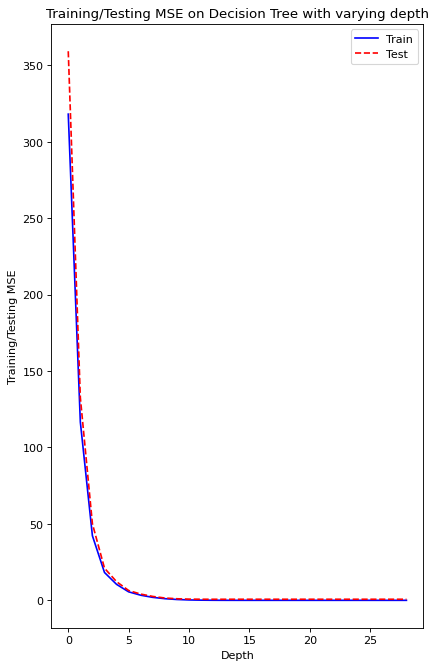

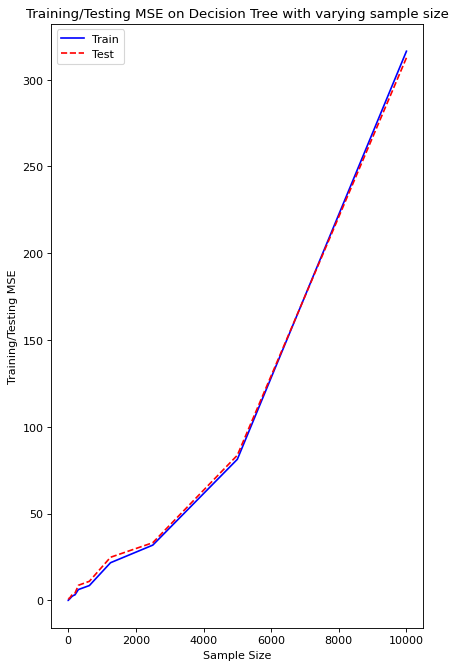

In [95]:
TRAIN_SIZE = 10000
TEST_SIZE = 1000
D = 50

x, xt, y = generate_data(TRAIN_SIZE, D)
_, tx, testy = generate_data(TEST_SIZE, D)

def question5_depth():
    train_errors = []
    test_errors = []
    
    #generate data
    x, xt, y = generate_data(TRAIN_SIZE, D) #d = 10, TRAIN_SIZE/TEST_SIZE remain unchanged
    _, tx, testy = generate_data(TEST_SIZE, D)
    
    for i in range(1, 30):    
        print('Iteration: ', i)
        #provide copies of the data (we want to use the same dataset on each tree)
        dt = DecisionTree(copy.deepcopy(x), copy.deepcopy(y), 1, i, 1)
        
        #compute errors
        training_err = compute_mse_dt(xt, y, dt)
        test_err = compute_mse_dt(tx, testy, dt)
        
        train_errors.append(training_err)
        test_errors.append(test_err)
    
    #build plot (can be seen in pdf)
    plt.figure(figsize = (6, 10), dpi = 80)
    plt.title('Training/Testing MSE on Decision Tree with varying depth')
    plt.plot(train_errors, '-b', label = 'Train')
    plt.plot(test_errors, '--r', label = 'Test')
    plt.xlabel('Depth')
    plt.ylabel('Training/Testing MSE')
    plt.legend()
    plt.show()
    
    return train_errors, test_errors

def question5_sample_size():
    train_errors = []
    test_errors = []
    
    #set of sample sizes that we will build decision trees out of
    #note that these are a set of decreasing and somewhat random numbers (more explanation in pdf)
    sample_sizes = [10000, 5000, 2500, 1250, 625, 300, 200, 150, 100, 50, 25, 20, 15, 10, 5, 4, 3, 2, 1]
    
    #generate dataset
    #x and y are used for the decision tree
    #xt is transpose of training dataset
    #tx (transpose of test dataset) and testy are a part of testing dataset
    x, xt, y = generate_data(TRAIN_SIZE, D)
    _, tx, testy = generate_data(TEST_SIZE, D)

    for sample_size in sample_sizes: #iterate through each sample size
        #build decision tree with copies of dataset
        dt = DecisionTree(copy.deepcopy(x), copy.deepcopy(y), 1, 150, sample_size)
        
        #compute and store errors
        training_err = compute_mse_dt(xt, y, dt)
        test_err = compute_mse_dt(tx, testy, dt)
        train_errors.append(training_err)
        test_errors.append(test_err)
    
    #build plots
    plt.figure(figsize = (6, 10), dpi=80)
    plt.title('Training/Testing MSE on Decision Tree with varying sample size')
    plt.plot(sample_sizes, train_errors, '-b', label = 'Train')
    plt.plot(sample_sizes, test_errors, '--r', label = 'Test')
    plt.xlabel('Sample Size')
    plt.ylabel('Training/Testing MSE')
    plt.legend()
    plt.show()
    
    return train_errors, test_errors

train1, test1 = question5_depth()
train2, test2 = question5_sample_size()

In [94]:
print(train1)
print(test1)

[324.31820015941724, 121.2788722348849, 44.42989304797166, 18.717713315746913, 10.426850438593837, 5.6036020490574865, 3.260816397528498, 1.9102556049705661, 1.0592944840319343, 0.5449764323528455, 0.28651568397318117, 0.16559611595019663, 0.11856234811425072, 0.10170944141355072, 0.09767764795038862, 0.09678413340043465, 0.09654838882839092, 0.09653697714269721, 0.09653697714269721, 0.09653697714269721, 0.09653697714269721, 0.09653697714269721, 0.09653697714269721, 0.09653697714269721, 0.09653697714269721, 0.09653697714269721, 0.09653697714269721, 0.09653697714269721, 0.09653697714269721]
[292.9653663137695, 121.56495520849116, 44.672344491922814, 18.789676306531696, 10.999203416840938, 6.0456365786268655, 4.015055893197927, 2.552824157244227, 1.5466550815076083, 0.8921589131245816, 0.6306584897660776, 0.5045681289030003, 0.48551373915455354, 0.4915031497095955, 0.4922779597907732, 0.49445021471728656, 0.49399464765665724, 0.49399572449409745, 0.49399572449409745, 0.49399572449409745,

In [97]:
print('hello world')

hello world


In [98]:
x = 3
y = 5
print(x + y)

8
